In [31]:
# !pip install ezdxf
import ezdxf
import os

# Get path to work space with os
dir_path = os.path.realpath('.')

# Load the DXF document
doc = ezdxf.readfile(dir_path + "/dxf_files/Rectangle_II.dxf")

# Get the modelspace which contains the entities
modelspace = doc.modelspace()

# Open the output file
with open(dir_path + "/csv_files/coordinates.csv", "w") as file:
    # Write the headers to the file
    file.write("X,Y,Z\n")
    
    # Iterate over each entity in the modelspace
    for entity in modelspace:
        # Check if the entity is a line
        if entity.dxftype() == 'LINE':
            # Write the start and end points of the line to the file
            file.write(f"{entity.dxf.start.x},{entity.dxf.start.y},{entity.dxf.start.z}\n")
            file.write(f"{entity.dxf.end.x},{entity.dxf.end.y},{entity.dxf.end.z}\n")

X: 5.7914544429097825 to 70.44519271169388
Y: 4.0304714015551975 to 67.68698351723806


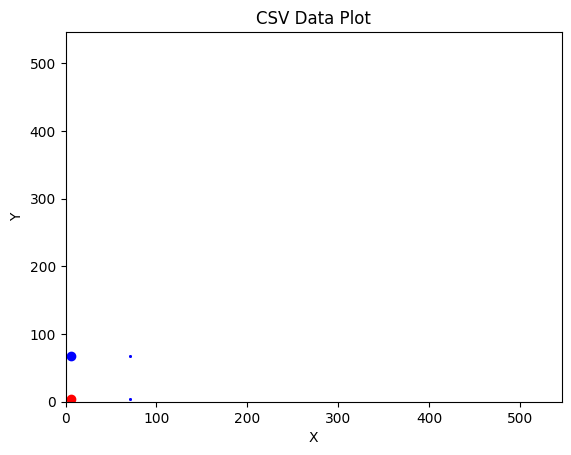

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(dir_path + "/csv_files/coordinates.csv")

# Get the 'X' and 'Y' columns
x = data['X']
y = data['Y']

# Print Cell visualization for data grid conversion
# Filament Extruder default size 1.75mm
cell_size = 1.75 # mm
# Build volume size 21.5 inch x 21.5 inch x 20 inch
build_dim = 21.5 * 25.4 # mm
# Create a grid of cells

# convert x y coordinate data to cell size
x = x / cell_size
y = y / cell_size

# Get edges of x and y from the data above
x_min = min(x)
x_max = max(x)
y_min = min(y)
y_max = max(y)
print(f"X: {x_min} to {x_max}"
      f"\nY: {y_min} to {y_max}")

# Plot the data on a 2D XY plane
plt.scatter(x, y, color='blue', s=1)
# Add a red dot for the first point
plt.scatter(x.iloc[0], y.iloc[0], color='red')
# Add a blue dot for the last point
plt.scatter(x.iloc[-1], y.iloc[-1], color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, build_dim)
plt.ylim(0, build_dim)
plt.title('CSV Data Plot')
plt.show()

312 312
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

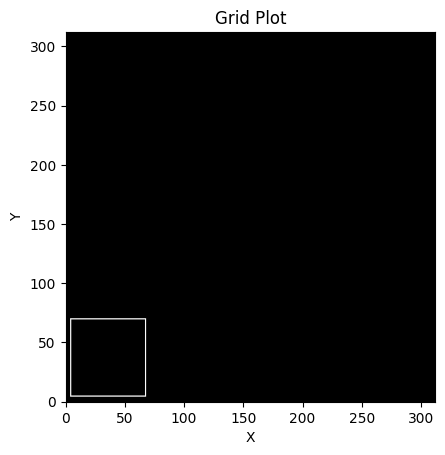

In [33]:
# Need to generate a grid of cells with size 1.75mm for the entire x y space
# Create a grid of cells
grid = []
for i in range(int(build_dim / cell_size)):
    row = []
    for j in range(int(build_dim / cell_size)):
        row.append(0)
    grid.append(row)

# size of grid
print(len(grid), len(grid[0]))

x_mm = len(grid) * 1.75 #mm
y_mm = len(grid[0]) * 1.75 #mm

# the grid will be filled with a 1 or 0 depending on if the line passes through the cell
# Iterate over each entity in the modelspace
for entity in modelspace:
    # Check if the entity is a line
    if entity.dxftype() == 'LINE':
        # Get the start and end points of the line
        start = entity.dxf.start
        end = entity.dxf.end
        # Convert the start and end points to cell coordinates
        start_x = int(start.x / cell_size)
        start_y = int(start.y / cell_size)
        end_x = int(end.x / cell_size)
        end_y = int(end.y / cell_size)
        # Bresenham's line algorithm
        dx = abs(end_x - start_x)
        dy = abs(end_y - start_y)
        if start_x < end_x:
            sx = 1
        else:
            sx = -1
        if start_y < end_y:
            sy = 1
        else:
            sy = -1
        err = dx - dy
        while True:
            # Set the cell to 1
            grid[start_x][start_y] = 1
            if start_x == end_x and start_y == end_y:
                break
            e2 = 2 * err
            if e2 > -dy:
                err = err - dy
                start_x = start_x + sx
            if e2 < dx:
                err = err + dx
                start_y = start_y + sy

# take the x and y data from the previous block to fill the grid i is x and j is y
# for i, j in zip(x, y):
    # grid[int(i)][int(j)] = 1
                
# Print the grid
for row in grid:
    print(row)
    
# Plot the grid to scale
plt.imshow(grid, cmap='gray', origin='lower')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, len(grid))
plt.ylim(0, len(grid[0]))
plt.title('Grid Plot')
plt.show()

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 50, 50, 51, 51, 52, 52, 53, 53, 54, 54, 55, 55, 56, 56, 57, 57, 58, 58, 59, 59, 60, 60, 61, 61, 62, 62, 63, 63, 64, 64, 65, 65, 66, 66, 67, 67, 68, 68, 69, 69, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70]
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 

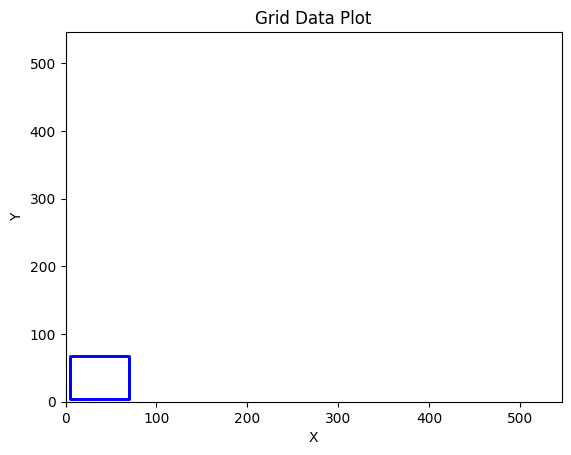

In [39]:
# the goal is to generate a workflow to create training data for a GPT model by feeding the model an array of grid locations that representa toolpath for a 3D printer
# The model will then use the training data to generate it's own toolpath for a 3D printer
# The model will be trained on the toolpath data
# toolpath data will be provided from dxf files
# convert dxf files to a grid of cells represented by ones and zeros
# with that grid extract the location of the ones for the model to train on
# the model will then generate it's own toolpath data

# get the x and y coordinates of the grid
x = []
y = []
for i in range(len(grid)):
    for j in range(len(grid[0])):
        if grid[i][j] == 1:
            x.append(i)
            y.append(j)

print(x)
print(y)

# Get edges of x and y from the data above
x_min = min(x)
x_max = max(x)
y_min = min(y)
y_max = max(y)
print(f"X: {x_min} to {x_max}"
      f"\nY: {y_min} to {y_max}")

# Plot the data on a 2D XY plane
plt.scatter(x, y, color='blue', s=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, x_mm)
plt.ylim(0, y_mm)
plt.title('Grid Data Plot')
plt.show()